## Observations and Insights

    From the statistal calculation of the mean and the box and whisker plots, the Capomulin and Ramicane appear to have the smallest over tumor volume. 
    When comparing the quartiles of the top four drug regimens, the Capomulin and Ramicane treated mice had the smallest tumor volumes at the end of treatment with 25th and 75th quartiles being approxmately 32 to 40 mm3, with a mean of 38 mm3. These two candidates show much more promising results than Infubinol and Ceftamin. 
    Specifically, mouse m601, treated with Capomulon displayed a marked decrease in tumor volume during the regimen. 
    There is a moderate correlation between mouse weight and tumor volume as shown in the scatter plot, which shows an r-squared value of approximately 0.7. 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset. Merge two datasets on "Mouse ID" using only mice with results, with left join.
merged_results = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
merged_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
#volume for each regimen:

In [5]:
#Group by Drug Regimen so that the statistics will be done on each drug type.
regimens_df = merged_results.groupby(["Drug Regimen"])

#mean(average) tumor volume with formatting.
ave_tumor_vol = regimens_df["Tumor Volume (mm3)"].mean().map("{:,.2f}".format)
#ave_tumor_vol

#median tumor volume with formatting.
med_tumor_vol = regimens_df["Tumor Volume (mm3)"].median().map("{:,.2f}".format)
#med_tumor_vol

#variance of tumor volumes with formatting.
var_tumor_vol = regimens_df["Tumor Volume (mm3)"].var().map("{:,.2f}".format)
#var_tumor_vol

#St.Dev of tumor volumes with formatting.
stdev_tumor_vol = regimens_df["Tumor Volume (mm3)"].std().map("{:,.2f}".format)
#stdev_tumor_vol

#SEM of tumor volumes with formatting.
sem_tumor_vol = regimens_df["Tumor Volume (mm3)"].sem().map("{:,.2f}".format)
#sem_tumor_vol

#Drug regimen tumor statistics summary table:
tumor_summary_df = pd.DataFrame({"Mean Tumor Volume":ave_tumor_vol,
                                 "Median Tumor Volume":med_tumor_vol,
                                 "Variance in Tumor Volume":var_tumor_vol,
                                 "St. Deviation of Tumor Volume":stdev_tumor_vol,
                                 "SEM of Tumor Volume":sem_tumor_vol
                                 })
tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,St. Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

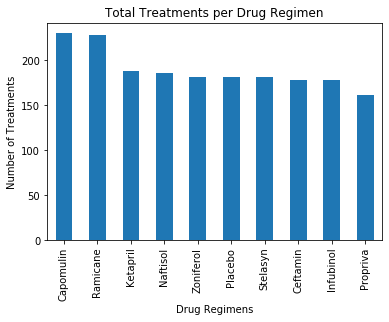

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#Look at how many datapoints exist for each drug regimen:
treatments = merged_results["Drug Regimen"].value_counts()

#Plot a bar graph of the treatments.
treatments.plot(kind="bar")
plt.title("Total Treatments per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Treatments")
plt.xticks(rotation=90)

Text(0, 0.5, 'Number of Treatments')

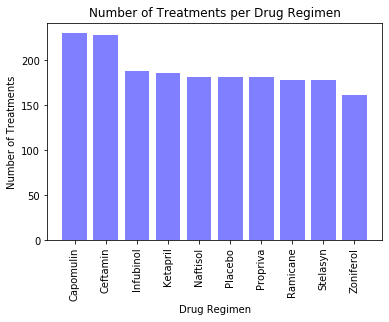

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
treatment_count = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
drug_regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.bar(drug_regimens, treatments, color='b', alpha=0.5, align='center')
plt.title("Number of Treatments per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Treatments")

## Pie plots

In [8]:
#Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of 
#female or male mice in the study.

#Sort by Mouse ID and then remove duplicates leaving only unique mice.
sort_mouseid = merged_results.sort_values("Mouse ID")
unique_mice_df = sort_mouseid.drop_duplicates(subset="Mouse ID", keep="first")
#unique_mice_df

#Now group by sex and do a count to get the number of male and female mice.
gender_group = unique_mice_df.groupby(["Sex"])
gender_count = gender_group["Mouse ID"].count()
gender_count

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Distribution of Male and Female Mice')

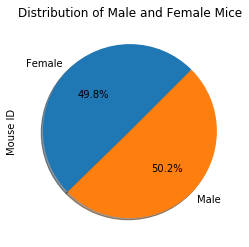

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count.plot(kind="pie", autopct="%1.1f%%", shadow=True, startangle=45)
plt.title("Distribution of Male and Female Mice")

(-1.1025967621734065,
 1.1005541258146507,
 -1.1013043806147866,
 1.1009293392510173)

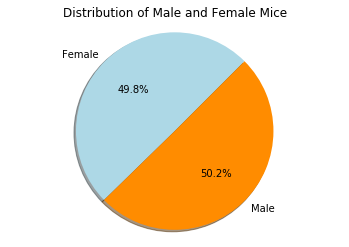

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
genders = ["Female", "Male"]
population = [124,125]
colors = ["lightblue", "darkorange"]
#explode = (0,1, 0, 0)
plt.title("Distribution of Male and Female Mice")
plt.pie(population, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")

## Quartiles, outliers and boxplots

In [11]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, 
#Infubinol, and Ceftamin.

#Make dataframe with mouse ID, timepoint, drug regimen, and tumor volume:
final_table = merged_results[["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]

#Sort these on mouse ID and timepoint
id_time_sort = final_table.sort_values(["Mouse ID","Timepoint"])
#id_time_sort

#Now that they are sorted remove duplicates and only keep the last one, which will be the final tumor volume measured:
last_volumes = id_time_sort.drop_duplicates(subset="Mouse ID", keep="last")

#Now only show the final tumor volume measurements for the four most promising treatment regimens:
last_volumes_top_four = last_volumes[(last_volumes["Drug Regimen"]=="Ramicane") | (last_volumes["Drug Regimen"]=="Capomulin") | (last_volumes["Drug Regimen"]=="Infubinol") | (last_volumes["Drug Regimen"]=="Ceftamin")]
top_four_final_volumes = last_volumes_top_four.sort_values(["Drug Regimen"])
top_four_final_volumes

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
282,l897,45,Capomulin,38.846876
337,j119,45,Capomulin,38.125164
317,j246,35,Capomulin,38.753265
104,u364,45,Capomulin,31.023923
360,g316,45,Capomulin,40.159220
...,...,...,...,...
94,j913,45,Ramicane,31.560470
194,j989,45,Ramicane,36.134852
9,k403,45,Ramicane,22.050126
74,m546,45,Ramicane,30.564625


In [13]:
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment 
#regimens based on the final tumor volumes for each of the four drugs.

#This function prints the upper and lower quartiles, the IQR, the median tumor volume and potential outliers for the four drugs.
def drug_quartiles(name):
    tumor_volume_df = top_four_final_volumes.loc[top_four_final_volumes["Drug Regimen"]==name,['Tumor Volume (mm3)']]
    quartiles = tumor_volume_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])

    lowerq = round(quartiles[0.25],1)
    upperq = round(quartiles[0.75],1)
    iqr = round((upperq-lowerq),1)
    
    print(f"The lower quartile of {name} tumor volume is: {lowerq}")
    print(f"The upper quartile of {name} tumor volume is: {upperq}")
    print(f"The interquartile range {name} of tumor volume is: {iqr}")
    print(f"The the median {name} tumor volume is: {round(quartiles[0.5],1)} ")

    lower_bound = round((lowerq - (1.5*iqr)),1)
    upper_bound = round((upperq + (1.5*iqr)),1)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("\n")

drug_quartiles("Capomulin")
drug_quartiles("Ramicane")
drug_quartiles("Infubinol")
drug_quartiles("Ceftamin")

The lower quartile of Capomulin tumor volume is: 32.4
The upper quartile of Capomulin tumor volume is: 40.2
The interquartile range Capomulin of tumor volume is: 7.8
The the median Capomulin tumor volume is: 38.1 
Values below 20.7 could be outliers.
Values above 51.9 could be outliers.


The lower quartile of Ramicane tumor volume is: 31.6
The upper quartile of Ramicane tumor volume is: 40.7
The interquartile range Ramicane of tumor volume is: 9.1
The the median Ramicane tumor volume is: 36.6 
Values below 18.0 could be outliers.
Values above 54.4 could be outliers.


The lower quartile of Infubinol tumor volume is: 54.0
The upper quartile of Infubinol tumor volume is: 65.5
The interquartile range Infubinol of tumor volume is: 11.5
The the median Infubinol tumor volume is: 60.2 
Values below 36.8 could be outliers.
Values above 82.8 could be outliers.


The lower quartile of Ceftamin tumor volume is: 48.7
The upper quartile of Ceftamin tumor volume is: 64.3
The interquartile range Cef

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9eb8c2d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9eb8d6400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9eb8c29e8>,
 'medians': [<matplotlib.lines.Line2D at 0x1e9eb8d6a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e9eb8d6dd8>,
 'means': []}

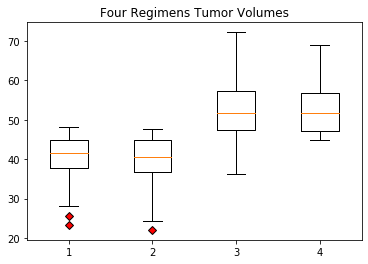

In [15]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens 
#and highlight any potential outliers in the plot by changing their color and style.
#plt.boxplot ([x1, x2, x3])
capomulin = merged_results.loc[merged_results["Drug Regimen"]=="Capomulin",['Tumor Volume (mm3)']]
#capomulin
ramicane = merged_results.loc[merged_results["Drug Regimen"]=="Ramicane",['Tumor Volume (mm3)']]
#ramicane
infubinol = merged_results.loc[merged_results["Drug Regimen"]=="Infubinol",['Tumor Volume (mm3)']]
#ionfubinol
ceftamin = merged_results.loc[merged_results["Drug Regimen"]=="Ceftamin",['Tumor Volume (mm3)']]
#ceftamin
plt.title("Four Regimens Tumor Volumes")
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot([capomulin['Tumor Volume (mm3)'], ramicane['Tumor Volume (mm3)'], infubinol['Tumor Volume (mm3)'], ceftamin['Tumor Volume (mm3)']],flierprops=red_diamond)

## Line and scatter plots

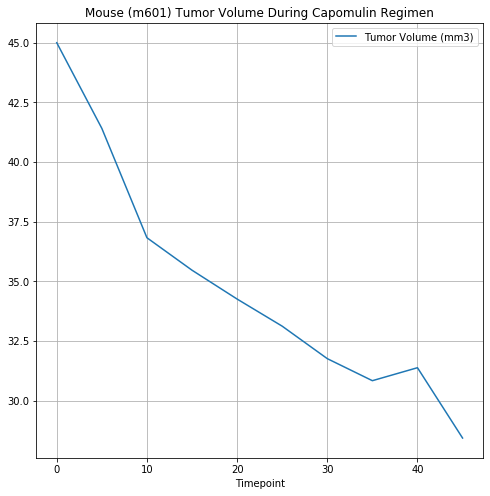

In [16]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Mouse m601 treated with Capomulin
m601_tumor_df = merged_results.loc[merged_results["Mouse ID"]=="m601",:]
#m601_tumor_df

#Line plot of mouse m601, x values are timepoint and y values are tumor volume.
m601_tumor_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8), 
                   title="Mouse (m601) Tumor Volume During Capomulin Regimen")

The r-squared is: 0.7088568047708717


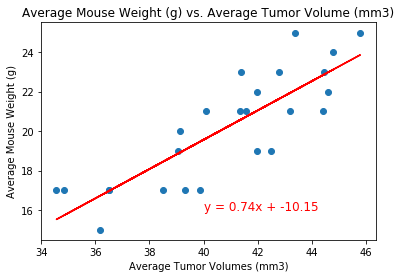

In [17]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen.
#Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the 
#Capomulin regimen

#make dataframe with only the Capomulin Drug Regimen
Capomulin_df = merged_results[merged_results["Drug Regimen"] == 'Capomulin']
#Capomulin_df

#groupby mouse ID so that the mean weight and mean tumor volume can be calculated for each mouse.
Capo_id_group = Capomulin_df.groupby(["Mouse ID"])

#average/mean mouse weight:
ave_weight = Capo_id_group["Weight (g)"].mean()
#ave_weight

#average/mean tumor volume:
ave_volume = Capo_id_group["Tumor Volume (mm3)"].mean()
#ave_volume

#Plot the mean mouse weight vs. mean tumor volume with linear regression trendline and r squared value:
x_axis = ave_volume
y_axis = ave_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,16),fontsize=12,color="red")
plt.xlabel('Average Tumor Volumes (mm3)')
plt.ylabel('Average Mouse Weight (g)')
plt.title("Average Mouse Weight (g) vs. Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")